# Comprendre le chômage en France 

Vous êtes vous déjà demandé d'où sortaient les chiffres qu'annoncent les politiques ou les media lorsqu'ils parlent de chômage. Etant un sujet d'intérêt dans les pays occidents, tentons de comprendre ce qu'ils se passent en termes de chômages en France. Pour cela, nous avons récupéré des données sur [data.gouv](https://www.insee.fr/fr/statistiques/3555153#consulter). Elles représentent les données du chômage en France en 2017



## Documentation du dataset 

Regarder la documentation du dataset [ici](https://www.insee.fr/fr/statistiques/3555153#documentation)

* Allez sur le lien suivant : [Dataset](https://www.insee.fr/fr/statistiques/3555153#consulter) et téléchargez le petit dataset de 9Mo. 

* En utilisant la commande `!unzip filename.zip` dézippez le fichier que vous avez téléchargé 

In [1]:
from zipfile import ZipFile
ZipFile("C:\\Users\\utilisateur\\Documents\\jupyter\\Comprendre le chômage en France_Matplolib\\fd_eec17_dbase.zip")

<zipfile.ZipFile filename='C:\\Users\\utilisateur\\Documents\\jupyter\\Comprendre le chômage en France_Matplolib\\fd_eec17_dbase.zip' mode='r'>

* Importez les librairies 
  * pandas 
  * numpy 

In [2]:
import pandas as pd 
import numpy as np

* Nous allons avoir besoin d'installer une librairie sur notre notebook pour pouvoir lire les fichiers. Utilisez la commande suivante : 

`!pip install simpledbf`

In [3]:
!pip install simpledbf

* Appliquez ensuite le code suivant : 

```
from simpledbf import Dbf5
dataset = Dbf5("fdeec17.dbf").to_dataframe()
dataset.head()
```

In [4]:
from simpledbf import Dbf5
dataset = Dbf5("C:\\Users\\utilisateur\\Documents\\jupyter\\Comprendre le chômage en France_Matplolib\\fdeec17.dbf").to_dataframe()
dataset.head(5)

,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,NFRRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,2017,1,1,1,2,50,50,2,1,1,...,30,52,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,2017,1,1,1,2,15,15,2,2,1,...,42,52,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2017,1,1,1,2,15,15,2,2,1,...,31,52,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,2017,3,1,1,2,50,50,2,1,1,...,30,52,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,2017,3,1,1,2,15,15,2,2,1,...,42,52,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN


* Importez `matplotlib`

In [5]:
import matplotlib.pyplot as plt

* En faisant un [pie-chart](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html), montrez la part de chômeurs, d'inactifs et d'actifs occupés en France à partir de la variable ACTEU. Faites attention de faire apparaitre : 

  * Le pourcentage de chaque partie 
  * Une légende 

Pour cela nous allons renommer les catégories numériques afin d'avoir une légende plus parlante. Analyser la ligne de commande suivante et comprenez comment elle fonctionne.

In [6]:
chomeurs = dataset.ACTEU.apply(lambda x: 
                               "Actif Occupé" if x=="1" 
                               else "Chômeur" if x == "2"
                               else "Inactif" if x=="3" 
                               else "NAN")
#Avec la fonction lambda on déroule la colonne ACTEU de notre base de donnée dataset et on applique des "alias" à chaque numéro 
#en fonction de la documentation

chcount= chomeurs.value_counts()
#On récupére une table avec les compte de la colonne ACTEU

print(chcount)

#J'ai pris le réflexe de print tout ce que je fais et plus globalement de découper au maximum mon travail. 

Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64


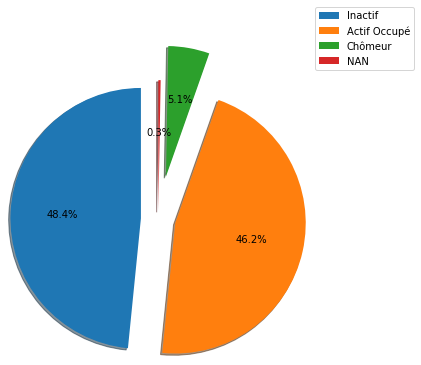

In [7]:
plt.pie(x=chomeurs.value_counts(), explode=(0.2,0.2,0.5,0.1), autopct="%1.1f%%", shadow=True, startangle=90, radius=1.5)
plt.legend(labels=chomeurs.value_counts().index, bbox_to_anchor=(1.7, 1.5))
plt.show()

---> Le chiffre du chômage semble bas et, si on regarde l'explication des *inactifs*, celle-ci semble inclure beaucoup de monde (étudiants, personne ne cherchant pas d'emploi etc.)

* Faites le même graphique sur la variable ACTEU6 qui est plus précise sur le type d'actifs   
Renommer les valeurs numériques :   
    1 : Actif Occupé  
    3 : Chômeur PSERE  
    4 : Autre Chômeur BIT  
    5 : Etudiant, élève, stagiaire en formation  
    6 : Autres inactifs (dont retraité)  
    

In [8]:
#On reproduit la même fonction lambda que pour ACTEU mais avec une nouvelle colonne
# ATTENTION avec vos variable pensezà recréer de nouvelles variables pour éviter d'écraser vos anciennes données.
#Ici chomeurs6 (Et pas chomeurs). Celà est important quand vous devez rappeller des variables plus tard.
chomeurs6 = dataset.ACTEU6.apply(lambda z: 
                               "Actif Occupé" if z=="1" 
                               else "Chômeur PSERE" if z == "3"
                               else "Autre chômeur BIT" if z=="4" 
                               else "Etudiant, élève, stagiaire en formation" if z=="5"
                               else "Autres inactifs (dont retraité)" if z=="6" 
                               else "NAN")
chcount6= chomeurs6.value_counts()
print(chcount6)
#Encore une fois je vérifie tout ce que je fais en direct

Actif Occupé                               198054
Autres inactifs (dont retraité)            172921
Etudiant, élève, stagiaire en formation     34599
Chômeur PSERE                               20854
NAN                                          1204
Autre chômeur BIT                            1010
Name: ACTEU6, dtype: int64


In [9]:
#Attention ici justement si vous avez écraser la première variable sortie par le premier lambda car on va le réutiliser ici 
#Pour modifié le dataset directement
dataset.ACTEU=chomeurs
#Attention ici vous modifé directement la base de donnée et pouvez cassser votre code car chaque champs va être modifié par sa valeur
#de chomage
print(dataset.ACTEU)
print(chcount)
#On vérifie ce que ça fonctionne bien 

0         Actif Occupé
1         Actif Occupé
2         Actif Occupé
3         Actif Occupé
4         Actif Occupé
              ...     
428637         Inactif
428638         Inactif
428639         Inactif
428640         Inactif
428641         Inactif
Name: ACTEU, Length: 428642, dtype: object
Inactif         207520
Actif Occupé    198054
Chômeur          21864
NAN               1204
Name: ACTEU, dtype: int64


Regardez la documentation pour renommer les valeurs de la colonne ACTEU.

* En créant un [stacked bar chart](https://pythonmatplotlibtips.blogspot.com/2018/11/normalized-stacked-barplot-number-percentage-python-matplotlib.html), comparez :

  * le rapport *chômeurs* / *Actifs occupés* 
  * Le rapport *chômeurs* / *Actifs occupés + Inactifs*

In [10]:

#Ici on fait les rapports entre les valeurs indexé (0,1,2,3 ici) et on applique nos opérations demandé pour avoir rapport.
#Oubliez pas le .value pour ne récupérer que la valeur numérique.
#Le résultat récupéré est un pourcentage  
#Je nomme mes valeurs numérique a et b (Attention au parenthése pour l'ordre des opérations.)

#a = chômeur / actif occupé 
a = dataset["ACTEU"].value_counts().values[2] / dataset["ACTEU"].value_counts().values[1]
#b = chômeur / actif occupé + inactif
b = dataset["ACTEU"].value_counts().values[2] / (dataset["ACTEU"].value_counts().values[1] + dataset["ACTEU"].value_counts().values[0])
print("Rapports de chômeurs\n", [a, b])



Rapports de chômeurs
 [0.11039413493289708, 0.05390878113488537]


In [11]:
print("Rapports d'actifs")
# c et d sont les valeurs mirroir du pourcentage. (a+c=100% = 1 donc c=1-a)
# Possible de recalculer avec les valeurs connus mais moins rapide. 
c=1-a
d=1-b
print("[",c,", ",d,"]")

Rapports d'actifs
[ 0.8896058650671029 ,  0.9460912188651146 ]


In [12]:
#Pour la suite j'ai copier / Coller ce code tutorial pour visualiser et reproduire les barcharts.
#Voici la source : https://pythonspot.com/matplotlib-bar-chart/

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]

#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')

([<matplotlib.axis.XTick at 0x27a03595088>,
 <a list of 2 Text xticklabel objects>)

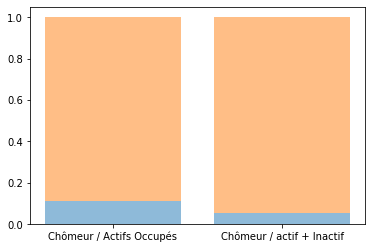

In [13]:
#On commence par créer nos listes de valeurs alignés l'une par rapport à l'autre (a avec c et b avec d)
#La raison est simple: comme on l'a dis plus haut a+c= 100% et b+d= 100% c'est ainsi qu'on aura les visuels en % que l'on souhaite
listp=[a,b]
listq=[c,d]

#On fixe une liste de légendes ici on le fait à la mains on vera comment l'implémenter directement d'une liste...
objects= ("Chômeur / Actifs Occupés","Chômeur / actif + Inactif")
#La fonction arange permet de fixer une valeurs d'inverval avec len pour autant de valeurs que la liste
y_pos = np.arange(len(objects))
#On appelle notre premier graphique en bar 
#Le premier argument est une valeur positionnelle généré par np.arange ici y_pos pour nous.
#Le deuxième argument est une liste contenant nos valeur ici listp et listq
#Les deux autres arguments sont optionel
plt.bar(y_pos,listp, align='center', alpha=0.5)
#Selon le même principe que pour le premier visuel on pose la seconde bar
#Je vous invite à tester l'argument "bottom" avec des valeurs numérique pour comprendre son fonctionnement
#Ici on fixe la valeur sur le premier graphique pour que notre deuxième graphique commence à la fin du premier.
plt.bar(y_pos,listq, align='center', alpha=0.5, bottom=listp)
#On pose enfin notre légendes sur la bar du bas.
plt.xticks(y_pos, objects)

In [14]:
#Félicitation si vous êtes arrivé jusqu'ici vous avez presque terminé la suite de l'exercice constitue
#une répétition de diverses formules que l'on a déjà utilisé dans cette exercice ou dans l'exercice Seaborn. 
#Si vous n'avez pas réussi le premier barplot je vous conseille d'essayer de faire la suite en appliquant tout ce que je vous ai 
#expliqué plus haut.

Il semblerait que nous étions 11% de chômeurs parmi la population active (travailleuse) en France en 2017 selon le BIT

* En créant à nouveau un [*bar chart*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) , regardez cette fois la répartition de l'ancienneté du chômage. Le nom de la variable est ANCCHOM, regardez la documentation pour recoder la valeur de cette colonne.

In [15]:

#On commence par réapliquer notre fonction Lambda et value.counts pour vérifié.
ancien= dataset.ANCCHOM.apply(lambda x: "Moins d'un mois" if x=="1"
                                 else "De 1 mois à moins de 3 mois " if x == "2"
                                 else "De 3 mois à moins de 6 mois" if x == "3"
                                 else "De 6 mois à moins d'un an" if x=="4"
                                 else "De 1 an à moins d'un an et demi" if x=="5"
                                 else "De 1 an et demi à moins de 2 ans" if x=="6"
                                 else "De 2 ans à moins de 3 ans" if x=="7"
                                 else "3 ans ou plus" if x=="8"
                                 else "NAN")
chcountA= ancien.value_counts()
print(chcountA)
#On applique à notre dataset (Attention cela modifie notre base de donnée soyez sures de vos variables.)
dataset["ANCCHOM"]=ancien

NAN                                 406904
3 ans ou plus                         3906
De 6 mois à moins d'un an             3648
De 1 an à moins d'un an et demi       3398
De 1 mois à moins de 3 mois           3270
De 3 mois à moins de 6 mois           3193
De 2 ans à moins de 3 ans             2289
De 1 an et demi à moins de 2 ans      1132
Moins d'un mois                        902
Name: ANCCHOM, dtype: int64


3 ans ou plus                       3906
De 6 mois à moins d'un an           3648
De 1 an à moins d'un an et demi     3398
De 1 mois à moins de 3 mois         3270
De 3 mois à moins de 6 mois         3193
De 2 ans à moins de 3 ans           2289
De 1 an et demi à moins de 2 ans    1132
Moins d'un mois                      902
Name: ANCCHOM, dtype: int64
['3 ans ou plus', "De 6 mois à moins d'un an", "De 1 an à moins d'un an et demi", 'De 1 mois à moins de 3 mois ', 'De 3 mois à moins de 6 mois', 'De 2 ans à moins de 3 ans', 'De 1 an et demi à moins de 2 ans', "Moins d'un mois"]
['3 ans ou plus', "De 6 mois à moins d'un an", "De 1 an à moins d'un an et demi", 'De 1 mois à moins de 3 mois ', 'De 3 mois à moins de 6 mois', 'De 2 ans à moins de 3 ans', 'De 1 an et demi à moins de 2 ans', "Moins d'un mois"]


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text yticklabel objects>)

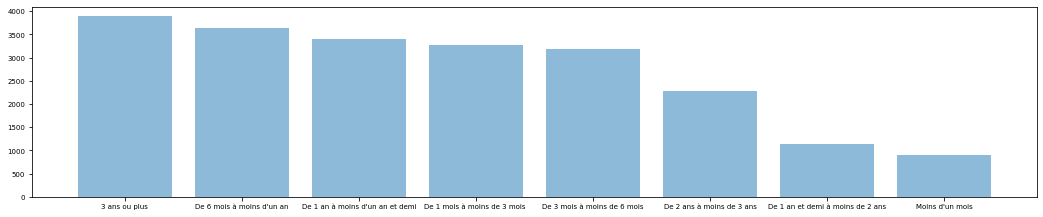

In [16]:
#Ici les solutions sont multiples pour ma part je fais le choix de créer un nouveau dataset comme dans l'exercice Seaborn
#J'utilise la fonction query qui me permet d'appliquer un filtre différent de "NAN" sur notre colonne.
dataset_2=dataset.query('ANCCHOM != "NAN"')

#Je test
chcount2= dataset_2['ANCCHOM'].value_counts()
print(chcount2)

#Ici deux mannière de stocké notre légende dans une variable liste. Les deux fonctionnes et reviennent exactement au même 
#Le .index.tolist permet de stocker notre index de chcount2 dans une variable liste.
bar2= dataset_2['ANCCHOM'].value_counts().index.tolist()
bar= chcount2.index.tolist()
print(bar)
print(bar2)

# On répéte encore une fois les étapes pour créer un barplot avec bar comme variable object pour y_pos
y_pos= np.arange(len(bar)) 
plt.figure(figsize=(18,3.5))
listo=np.arange(len(bar))
valeur=chcount2.values
plt.bar(y_pos, valeur, align='center', alpha= 0.5)

plt.xticks(y_pos, bar, fontsize=7)
plt.yticks(fontsize=7)

* La répartition se voit assez mal sur le *bar chart*, tentez de le refaire sur un *pie chart* 

([<matplotlib.patches.Wedge at 0x27a039dee48>,
 [Text(-1.1769821471310258, 1.85868583287624, ''),
  Text(-2.1919801919923554, -0.1876774837671174, ''),
  Text(-0.9906400714278336, -1.964340156103687, ''),
  Text(1.0481142952202893, -1.9342844734306475, ''),
  Text(2.178418301951003, -0.30739827866289193, ''),
  Text(1.7486143248167, 1.3350460452905126, ''),
  Text(0.9057287004497171, 2.004907858526588, ''),
  Text(0.2859756341558149, 2.1813339810008876, '')],
 [Text(-0.6419902620714685, 1.0138286361143125, '18.0%'),
  Text(-1.1956255592685574, -0.10236953660024585, '16.8%'),
  Text(-0.5403491298697274, -1.0714582669656474, '15.6%'),
  Text(0.5716987064837942, -1.0550642582348986, '15.0%'),
  Text(1.188228164700547, -0.1676717883615774, '14.7%'),
  Text(0.9537896317182, 0.7282069337948249, '10.5%'),
  Text(0.4940338366089365, 1.093586104650866, '5.2%'),
  Text(0.15598670953953536, 1.189818535091393, '4.1%')])

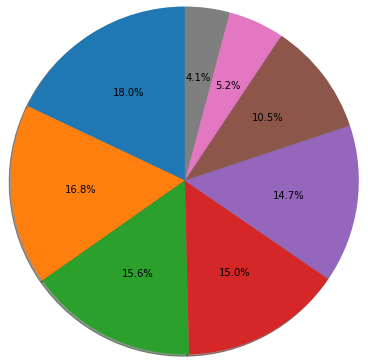

In [17]:
#On créait un nouveau pieplot beaucoup plus classique que les autres d'ailleurs. 
plt.pie(x= chcount2, startangle=90, shadow=True, radius=2, autopct="%1.1f%%")

* Il serait intéressant de voir la répartition des personnes inscrites à Pôle Emploi ou dans un organisme de placement parmi ces personnes au chômage. Regardez cette répartition grâce à la colonne CONTACT 
  * Enlevez directement les NaN de votre graphique

In [18]:
#Retour à une fonction Lambda
inscrit= dataset.CONTACT.apply(lambda x: "Oui" if x=="1"
                                           else "Non" if x == "2"
                                           else "NAN")
#On retest (Encore)
chcoi= inscrit.value_counts()
print(chcoi)

NAN    399514
Non     15984
Oui     13144
Name: CONTACT, dtype: int64


('Non', 'Oui')
[15984, 13144]


Text(0.5, 1.0, 'inscription dans un organisme de placement')

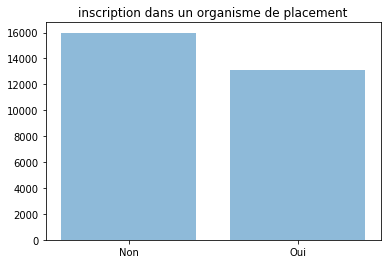

In [19]:
#Ici on doit pouvoir automatisé voir créer une nouvelle base comme dans le barplot précédent étant donné que l'on a que
#Deux donné je me suis contenté de faire le processus manuellement 

bar= ('Non', 'Oui')
y_pose= np.arange(len(bar))

#Petite subtilité ici je récupére seulement les données qui m'intéresse grace à l'index (Voir exercice avec les rapports)
count= [dataset["CONTACT"].value_counts().values[0],dataset["CONTACT"].value_counts().values[1]]
print(bar)
print(count)
plt.bar(y_pose, count, align="center", alpha=0.5)
plt.xticks(y_pose, bar)
#On rajoute un titre
plt.title('inscription dans un organisme de placement')

* Regardons ce qui pousse les français à changer d'emploi, grâce à la colonne CREACCP, crééz un bar chart horizontale qui va permettre de connaitre les principales raisons de changement d'emploi des français. 

In [20]:
#On utilise une fonction lambda

raison = dataset.CREACCP.apply(lambda x: "Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)" if x=="1"
                                           else "Désire un emploi plus intéressant" if x == "2"
                                           else "Veut un emploi plus stable (CDI)" if x == "3"
                                           else "Veut travailler plus d'heures" if x=="4"
                                           else "Désire un travail avec un rythme horaire plus adapté ou plus modulable" if x=="5"
                                           else "Désire des conditions de travail moins pénibles ou plus adaptées à sa santé" if x=="6"
                                           else "Désire augmenter ses revenus" if x=="7"
                                           else "Désire diminuer son temps de transport" if x=="8"
                                           else "Doit ou veut déménager" if x=="9"
                                           else "Veut s'installer à son compte" if x=="10"
                                           else "Veut changer de métier ou de secteur" if x=="11"
                                           else "Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles" if x=="12"
                                           else "NAN")
dataset.CREACCP=raison
# ascending permet d'appliquer un tri sur nos données de value_count.
chrai= raison.value_counts(ascending=True)
print(chrai)

Doit ou veut déménager                                                                   216
Veut s'installer à son compte                                                            354
Désire diminuer son temps de transport                                                   598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                  1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles          1223
Veut changer de métier ou de secteur                                                    1392
Veut travailler plus d'heures                                                           1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)      1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé             1820
Veut un emploi plus stable (CDI)                                                        2462
Désire un emploi plus intéressant                                     

In [21]:
#On créait un nouveau dataset excluant les NAN
dataset_3=dataset.query("CREACCP!='NAN'")

chrai3=dataset_3.CREACCP.value_counts(ascending=True)
print(chrai3)

Doit ou veut déménager                                                                 216
Veut s'installer à son compte                                                          354
Désire diminuer son temps de transport                                                 598
Désire un travail avec un rythme horaire plus adapté ou plus modulable                1102
Trouve l'ambiance de travail mauvaise, les relations de travail conflictuelles        1223
Veut changer de métier ou de secteur                                                  1392
Veut travailler plus d'heures                                                         1404
Risque de perdre ou va perdre son emploi actuel (y compris fin de contrats courts)    1582
Désire des conditions de travail moins pénibles ou plus adaptées à sa santé           1820
Veut un emploi plus stable (CDI)                                                      2462
Désire un emploi plus intéressant                                                     2779

In [22]:

#On créer une liste de valeur 
#normalize permet de normaliser les valeurs : on divise chaque valeurs par le total de données 
#Celà créait des valeurs allant de 0 à 1 dont le total est égale à 1
#on obtient un pourcentage et en multipliant le tout par 100 on récupére des valeurs facilements lisibles.
prct=dataset_3["CREACCP"].value_counts(ascending= True, normalize= True).values * 100

#On arrondit les pourcentages
prct=prct.round(2)
print(prct)

[ 1.    1.63  2.75  5.08  5.63  6.41  6.47  7.29  8.38 11.34 12.8  31.21]


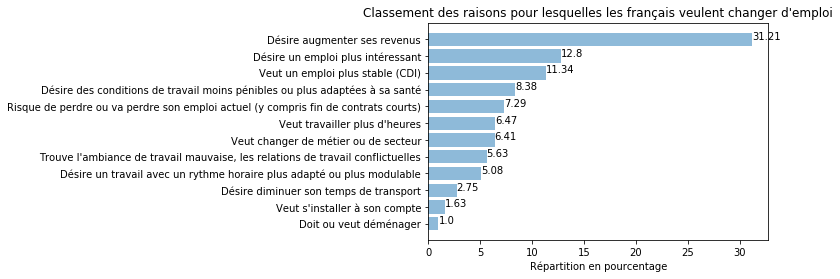

In [23]:

#On créer un nouveau barchart mais cette fois horizontal. 
#Un bar classique mais avec barh. 
#On stock l'index dans une variable
labels = chrai3.index
#Et on créer notre interval avec arange. 
y_pos = np.arange(len(chrai3))

#Taille de la figure 
plt.figure(figsize=(6.1,4))
#On argument notre barh
plt.barh(y_pos, prct, align='center', alpha=0.5, tick_label=prct)
#plt.xticks((0, 5, 10, 15, 20, 25, 30), prct)
#Le Xticks est généré tout seul.
plt.yticks(y_pos, labels)
plt.xlabel("Répartition en pourcentage")
plt.title("Classement des raisons pour lesquelles les français veulent changer d'emploi")

#Petite boucle pour généré les textes des bars 
for index, value in enumerate(prct):
    plt.text(value, index, str(value))
    
plt.show()